In [158]:
import numpy as np
import math
import matplotlib.pyplot as plt
import networkx as nx

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


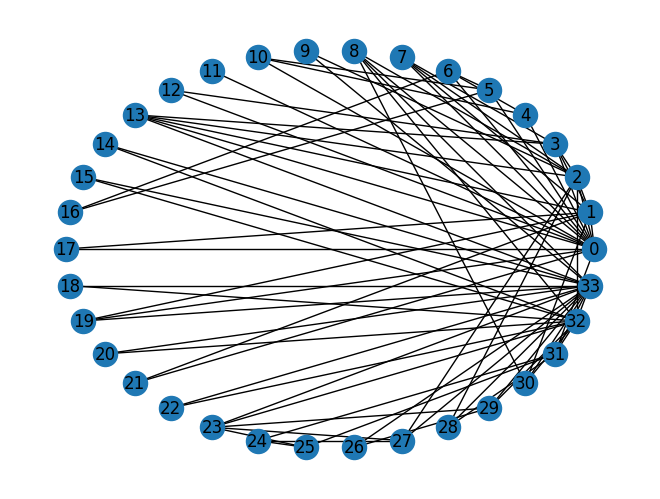

In [159]:
G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [160]:
A = nx.to_numpy_array(G)
print(A)
A = np.array(A > 0, dtype=int)
print(A)
n = A.shape[0]

[[0. 4. 5. ... 2. 0. 0.]
 [4. 0. 6. ... 0. 0. 0.]
 [5. 6. 0. ... 0. 2. 0.]
 ...
 [2. 0. 0. ... 0. 4. 4.]
 [0. 0. 2. ... 4. 0. 5.]
 [0. 0. 0. ... 4. 5. 0.]]
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [161]:
D = np.zeros(A.shape, int)
degrees = np.sum(A, axis=1)
for i in range(n):
    D[i][i] = degrees[i]
print(D)

D_inverse = np.linalg.inv(D)
print(D_inverse)

[[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]
[[0.0625     0.         0.         ... 0.         0.         0.        ]
 [0.         0.11111111 0.         ... 0.         0.         0.        ]
 [0.         0.         0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.16666667 0.         0.        ]
 [0.         0.         0.         ... 0.         0.08333333 0.        ]
 [0.         0.         0.         ... 0.         0.         0.05882353]]


In [162]:
P = np.matmul(D_inverse, A)

In [163]:
def set_node_distance(P_t, C, node):
    return sum(P_t[i, node] for i in C) / len(C)

In [164]:
def sets_distance(C1, C2, t):
    P_t = np.linalg.matrix_power(P, t)
    r_2 = sum((math.pow(set_node_distance(P_t, C1, k) - set_node_distance(P_t, C2, k), 2) / degrees[k]) for k in range(n))
    return math.sqrt(r_2)

In [165]:
max_float = float("inf")
def min_distance(sets, t):
    min_distance_value = max_float
    set_i = -1
    set_j = -1
    distances_2_sum = 0
    for i in range(len(sets)):
        for j in range(i):
            distance = sets_distance(sets[i], sets[j], t)
            distances_2_sum += distance * distance
            if distance < min_distance_value:
                min_distance_value = distance
                set_i = i
                set_j = j
    return (set_i, set_j, min_distance_value, distances_2_sum / len(sets))

In [166]:
def cluster(t, conductance):
    sets = [{i} for i in range(n)]
    while(len(sets) > 1):
        set_i, set_j, min_distance_value, r_geom_mean = min_distance(sets, t)
        if set_i != -1:
            if r_geom_mean < conductance:
                return sets
            merged_sets = sets[set_i].union(sets[set_j])
            del sets[set_i]
            del sets[set_j]
            sets.append(merged_sets)
            print("min distance: " + str(min_distance_value) + ", sets distance geometric mean: " + str(r_geom_mean))
    return sets

In [167]:
def plot_sets(sets):
    colors = [*range(n)]
    for i in range(len(sets)):
        for e in sets[i]:
            colors[e] = i
    nx.draw(G, node_color=colors)

## Q28 answer

min distance: 0.0, sets distance geometric mean: 0.48006812750684286
min distance: 0.0, sets distance geometric mean: 0.46856207574653297
min distance: 0.0, sets distance geometric mean: 0.4563368957512042
min distance: 0.0, sets distance geometric mean: 0.4449180164148738
min distance: 5.146021447227411e-18, sets distance geometric mean: 0.43217737611119567
min distance: 0.03123543841126234, sets distance geometric mean: 0.4185580709589881
min distance: 0.047920129849232065, sets distance geometric mean: 0.41256909428642363
min distance: 0.057666383428611294, sets distance geometric mean: 0.4010082636024521
min distance: 0.06355936694440693, sets distance geometric mean: 0.394858637239033
min distance: 0.06357871973076358, sets distance geometric mean: 0.38444957846509253
min distance: 0.0670531989650692, sets distance geometric mean: 0.3753211622308725
min distance: 0.07034384590753182, sets distance geometric mean: 0.36892681158532026
min distance: 0.07557238539181978, sets distance

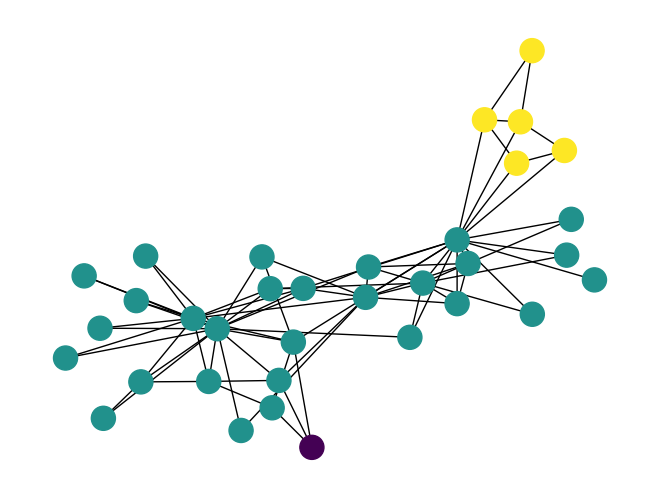

In [168]:
sets = cluster(2, 0.05)
sets
plot_sets(sets)

همانطور که مشاهده می‌کنیم با تنظیم مقدار 0.05 برای حساسیت خوشه‌بندی به نسبت خوبی انجام شده است.
هر چند با افزایش دادن مراحل می‌توانیم خوشه‌بندی دقیق‌تری داشته باشیم.
برای مثال درون گراف هم‌اکنون راس‌هایی را مشاهده می‌کنیم که تنها با یک یال درون یک خوشه حساب شده‌اند ولی برای مثال راس بنفش جزو خوشه به حساب نیامده است.
در قسمت بعد خوشه‌بندی دقیق‌تر خواهد شد.

## Q29 answer

min distance: 0.0, sets distance geometric mean: 0.08780764892706867
min distance: 0.0, sets distance geometric mean: 0.08537077562859294
min distance: 0.0, sets distance geometric mean: 0.08278159774896243
min distance: 0.0, sets distance geometric mean: 0.08132811329356014
min distance: 7.058585389114279e-18, sets distance geometric mean: 0.07864560034793497
min distance: 0.008396235604144405, sets distance geometric mean: 0.07577808650950808
min distance: 0.010249899924000801, sets distance geometric mean: 0.07324804403393316
min distance: 0.010423476903607152, sets distance geometric mean: 0.07276957404506884
min distance: 0.011058166568539161, sets distance geometric mean: 0.07199361771885776
min distance: 0.012238136519594397, sets distance geometric mean: 0.0706225481631821
min distance: 0.013056918178579945, sets distance geometric mean: 0.06956632474271333
min distance: 0.013615297271114477, sets distance geometric mean: 0.06845190794196812
min distance: 0.01538174289710139, s

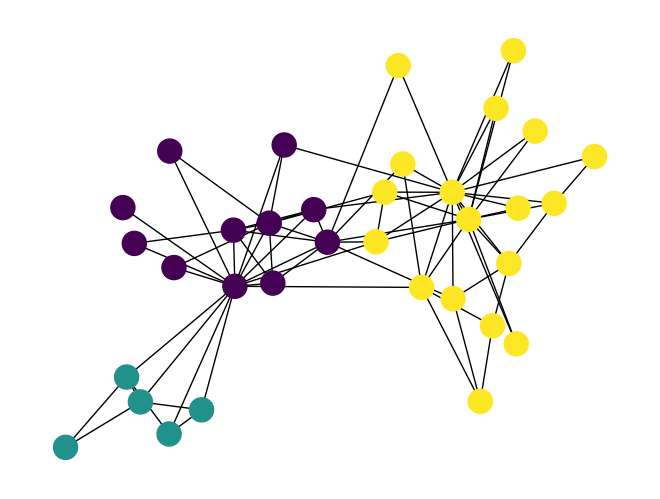

In [173]:
sets = cluster(5, 0.01)
sets
plot_sets(sets)

همان‌طور که مشاهده می‌کنیم خوشه‌بندی در این قسمت بسیار دقیق‌تر انجام شده است.
البته نیاز بود درجه حساسیت درست تنظیم شود. هر چه مقدار مراحل بیشتر شود خوشه‌بندی دقیق‌تر خواهد شد.
هم‌چنین هرچه درجه حساسیت بیشتر باشد، گراف تعداد خوشه‌های بیشتری خواهد داشت که بعضا بسیار با حالت ایده‌آل فاصله دارد.